In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

In [7]:
df = pd.read_csv('linreg-data.csv', index_col=0)
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [9]:
# Declaramos las variables de datos de entrada y datos de salida

Datos_entrada = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float)
Datos_salida = torch.tensor(df['y'].values, dtype=torch.float)

# Mezcla y división del conjunto de datos en datos de entrenamiento y datos de prueba

torch.manual_seed(123)
mezcla_idx = torch.randperm(Datos_salida.size(0), dtype=torch.long)

Datos_entrada, Datos_salida = Datos_entrada[mezcla_idx], Datos_salida[mezcla_idx]

percent70 = int(mezcla_idx.size(0)*0.7)

Datos_entrada_entrenamiento, Datos_entrada_prueba = Datos_entrada[mezcla_idx[:percent70]], Datos_entrada[mezcla_idx[percent70:]]
Datos_salida_entrenamiento, Datos_salida_prueba = Datos_salida[mezcla_idx[:percent70]], Datos_salida[mezcla_idx[percent70:]]

# Normalizamos los datos (media cero, varianza uno)

mu, sigma = Datos_entrada_entrenamiento.mean(dim=0), Datos_entrada_entrenamiento.std(dim=0)
Datos_entrada_entrenamiento = (Datos_entrada_entrenamiento - mu) / sigma
Datos_entrada_prueba = (Datos_entrada_prueba - mu) / sigma

In [17]:
def solucion_analitica(x, y):
    Xb = torch.cat( (torch.ones((x.size(0), 1)), x), dim=1)
    w = torch.zeros(x.size(1))
    z = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

w, b = solucion_analitica(Datos_entrada_entrenamiento, Datos_salida_entrenamiento)
print('Pesos analíticos', w)
print('Bias analítica', b)

Pesos analíticos tensor([[ 0.3624],
        [37.8801]])
Bias analítica tensor([-0.5464])


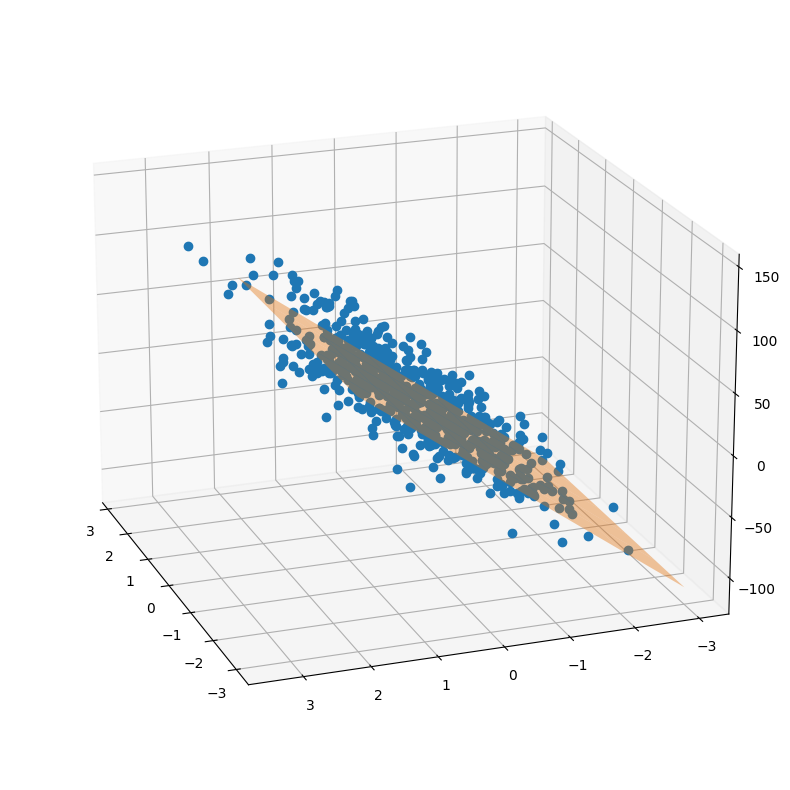

In [50]:
# Construimos un plano que nos muestre la función lineal creada con la regresión lineal, al ser 2 valores de entrada x1 y x2 obtendremos un plano
xx, yy = np.meshgrid(range(-3,3), range(-3,3))
zz = w[0]*xx + w[1]*yy + b


fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(Datos_entrada_entrenamiento[:, 0], Datos_entrada_entrenamiento[:, 1], Datos_salida_entrenamiento, 'o')  # Graficamos los datos de entrenamiento
ax1.plot_surface(xx, yy, zz, alpha=0.4)     # Graficamos el plano
ax1.view_init(elev=20., azim=-200, roll=0)  # Código para cambiar la vista del gráfico
plt.show()